In [1]:
from ipynb.fs.full.Models import *

plot requires loaded models. Model(country, time)

In [2]:
models = []
for i,country in enumerate(countries):
    mods=[]
    for time in times:
        mod=Model(country, SIR, time=time, start=starts[i])
        #mod=country+' '+time #just test line
        mods.append(mod)
    mods=dict(zip(times,mods))
    models.append(mods)
models=dict(zip(countries,models))

Creating SIR for Italy
Loaded country's population
Loaded time series of 116 days
Lockdown at 2020-03-11 -> at day 49
VA-lockdown index: 32
Creating SIR for Italy
Loaded country's population
Loaded time series of 116 days
Lockdown at 2020-03-11 -> at day 49
VA-lockdown index: 32
Creating SIR for Italy
Loaded country's population
Loaded time series of 116 days
Lockdown at 2020-03-11 -> at day 49
VA-lockdown index: 32
Creating SIR for Italy
Loaded country's population
Loaded time series of 116 days
Lockdown at 2020-03-11 -> at day 49
VA-lockdown index: 32
Creating SIR for Germany
Loaded country's population
Loaded time series of 111 days
Lockdown at 2020-03-20 -> at day 58
VA-lockdown index: 41
Creating SIR for Germany
Loaded country's population
Loaded time series of 111 days
Lockdown at 2020-03-20 -> at day 58
VA-lockdown index: 41
Creating SIR for Germany
Loaded country's population
Loaded time series of 111 days
Lockdown at 2020-03-20 -> at day 58
VA-lockdown index: 41
Creating SIR f

# 1. Fixed weights
Plot: v_a + beta + original data<br>
number of plots: times = 4

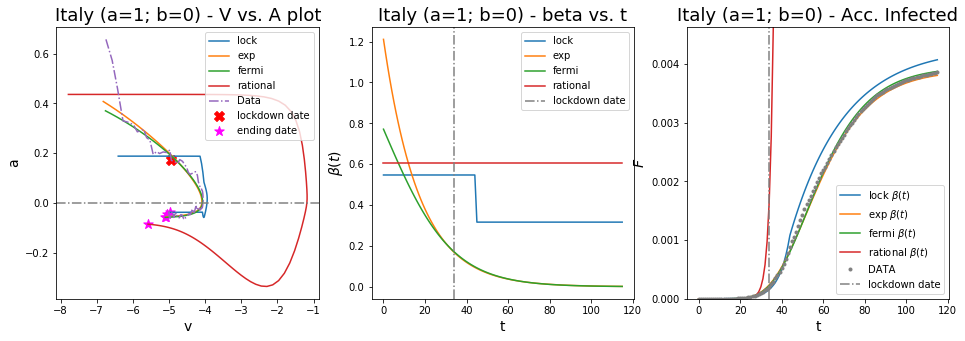

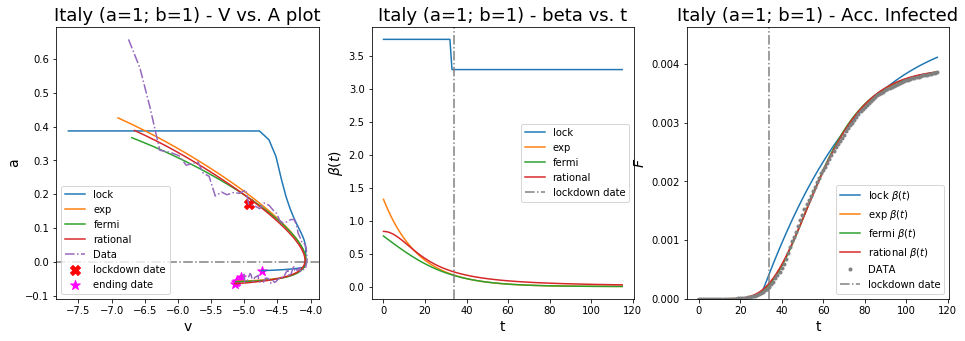

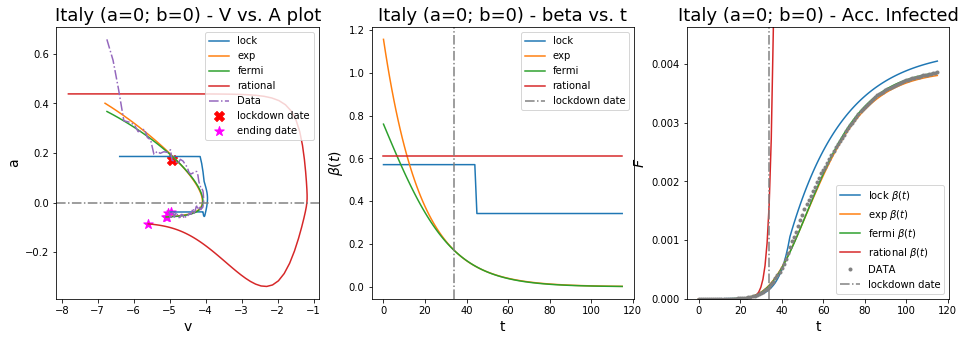

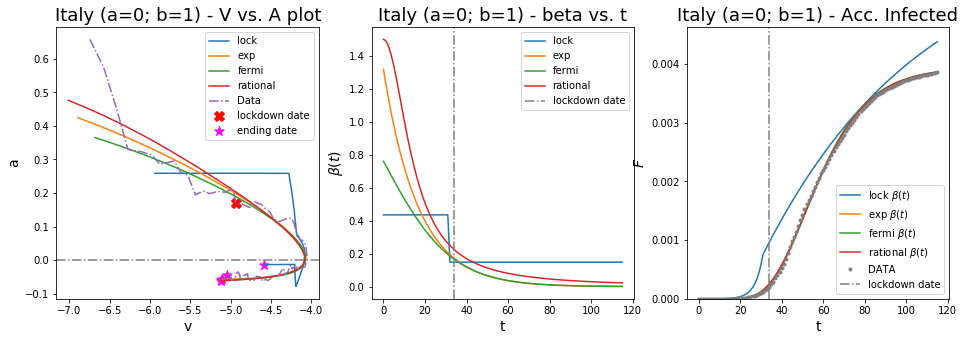

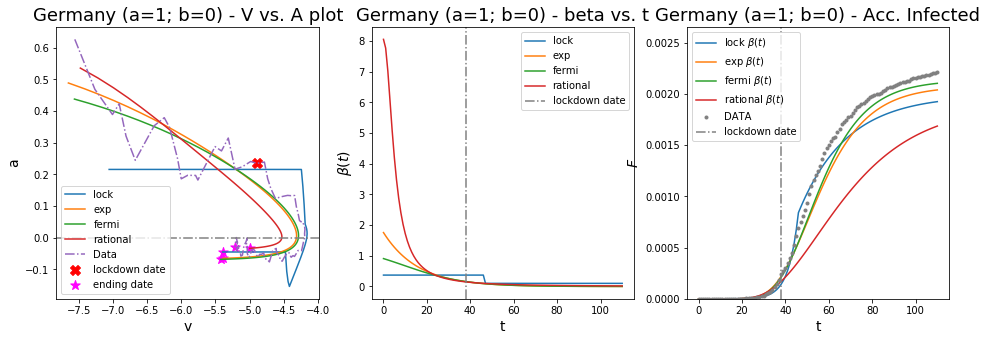

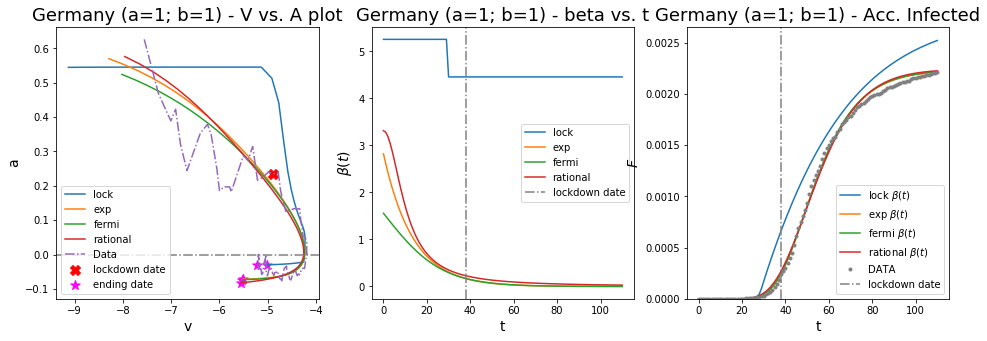

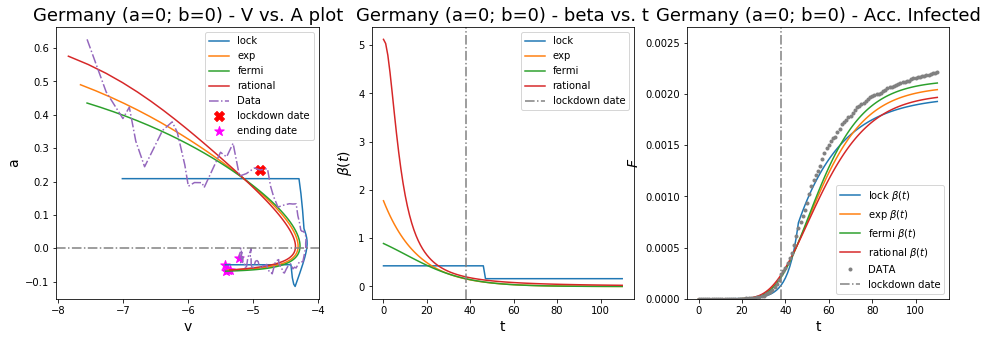

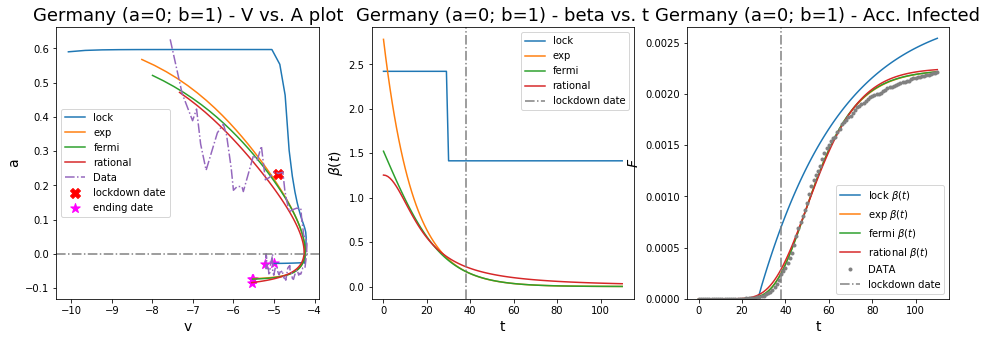

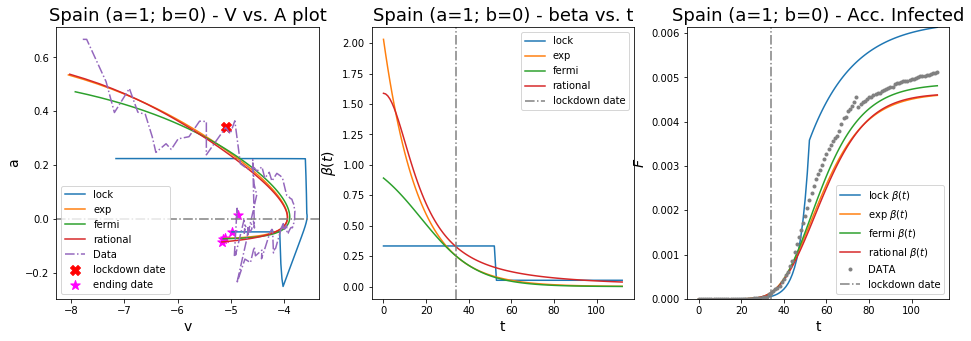

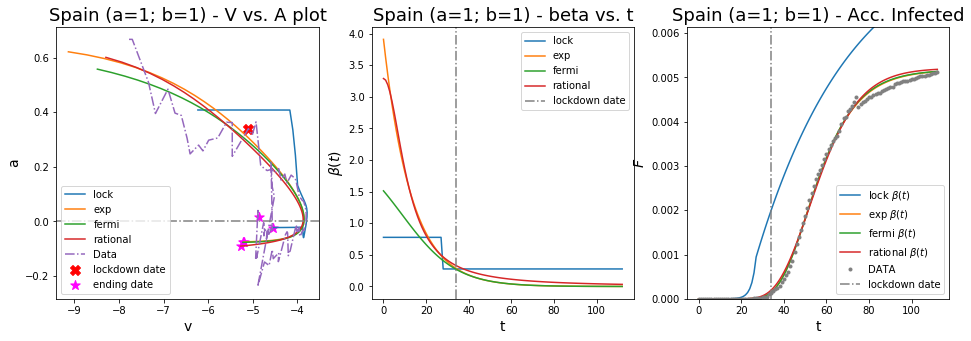

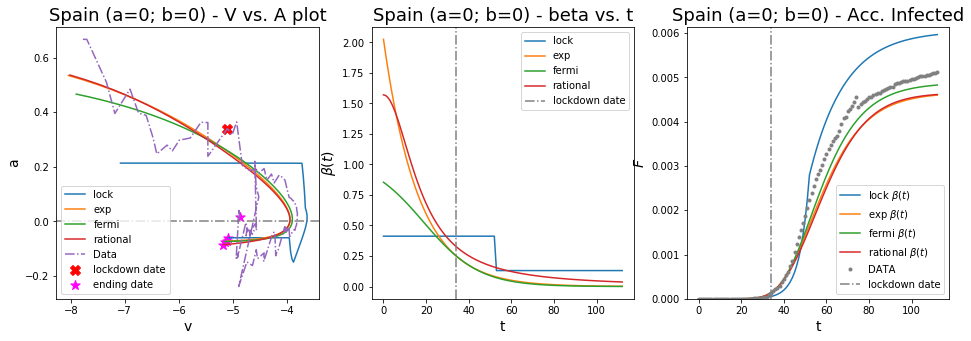

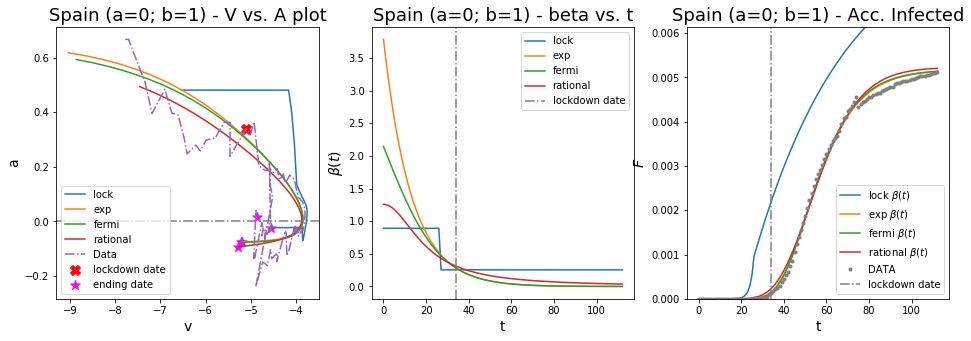

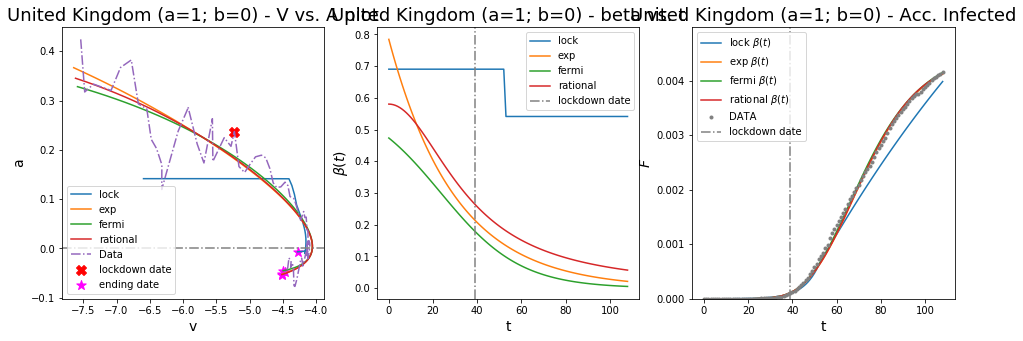

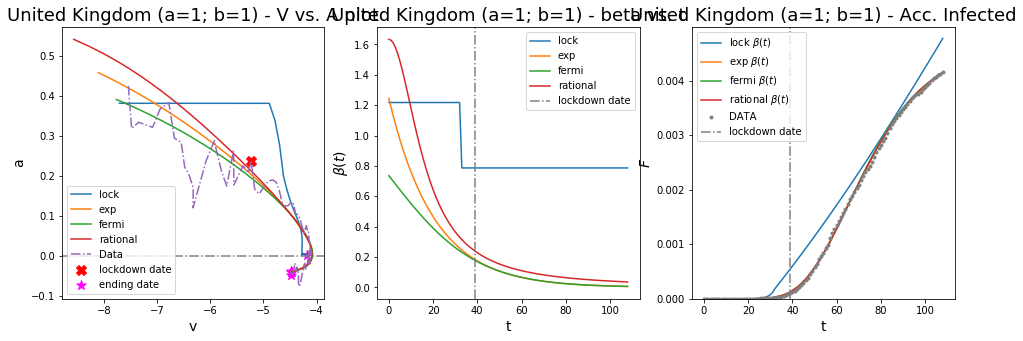

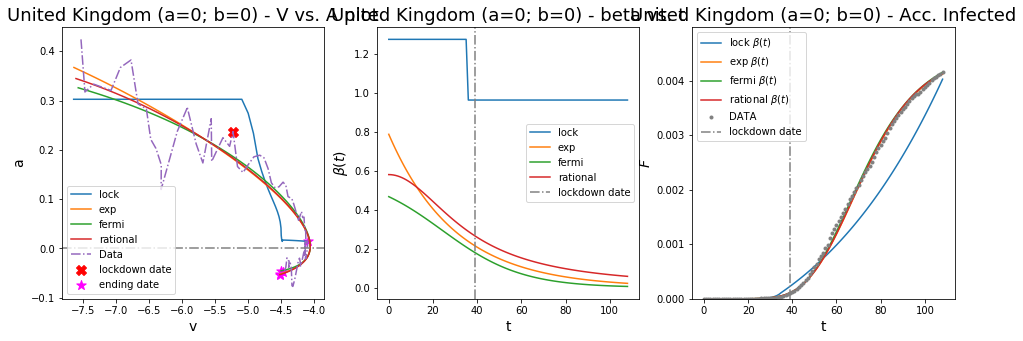

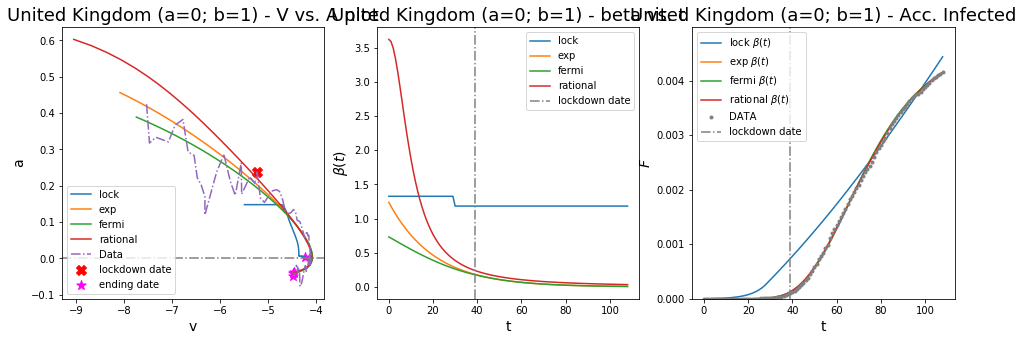

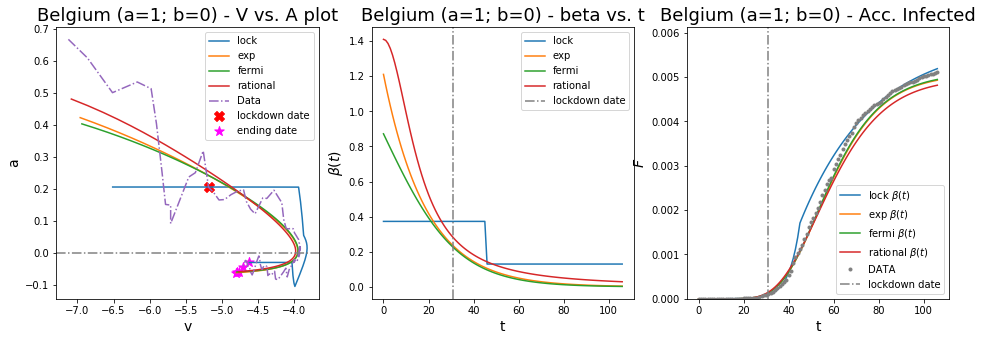

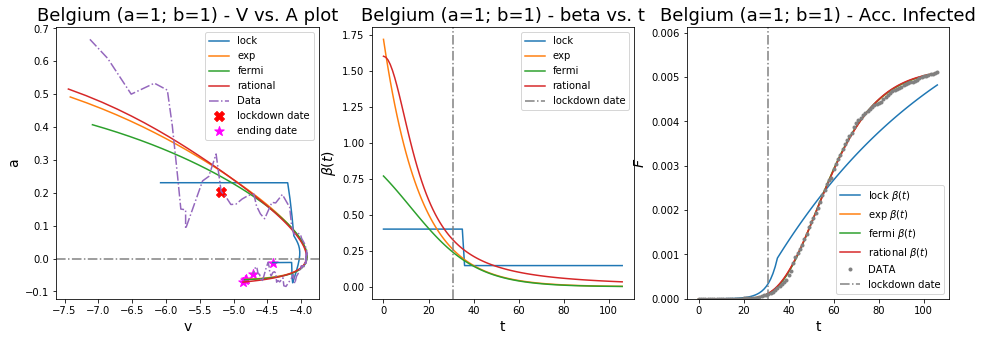

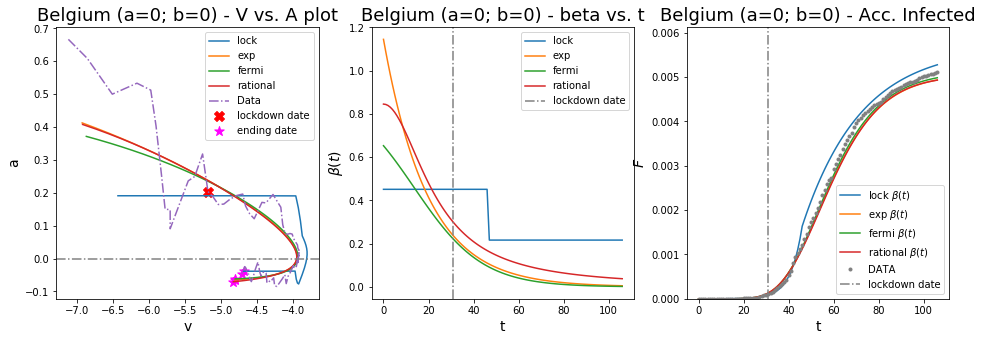

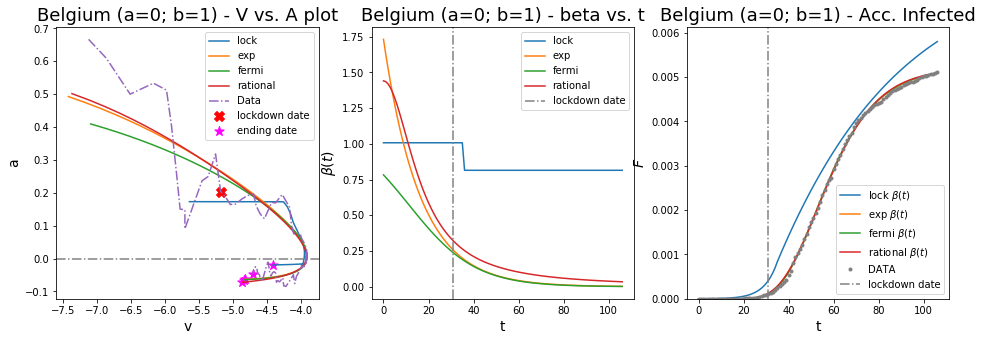

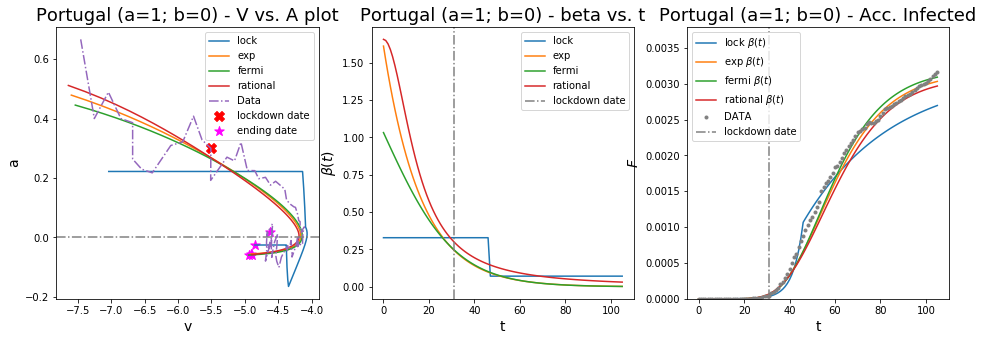

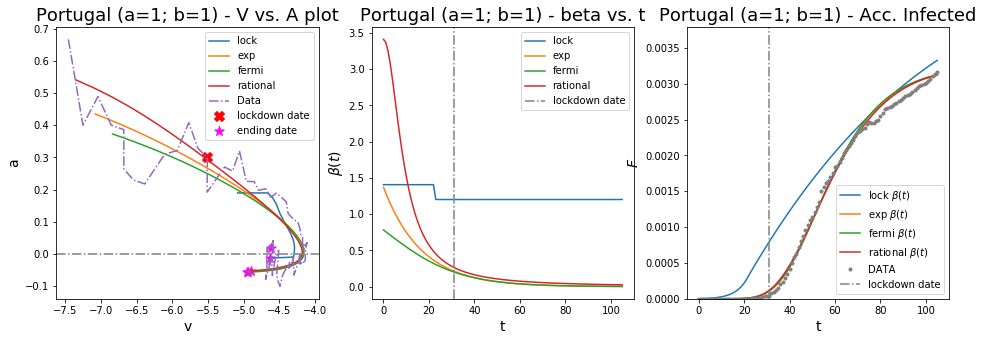

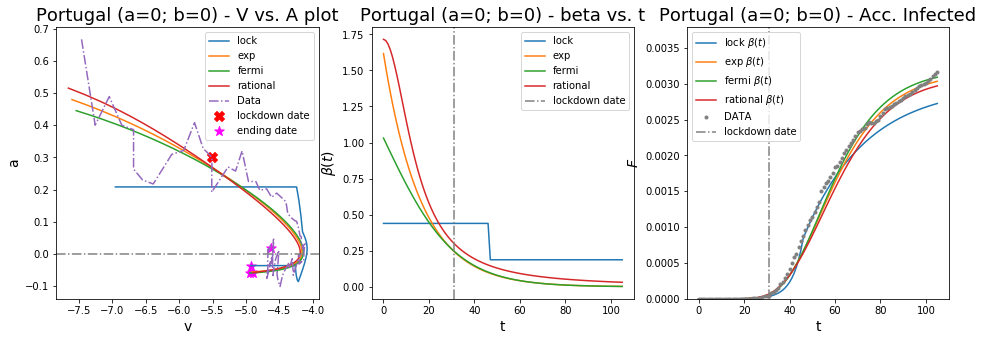

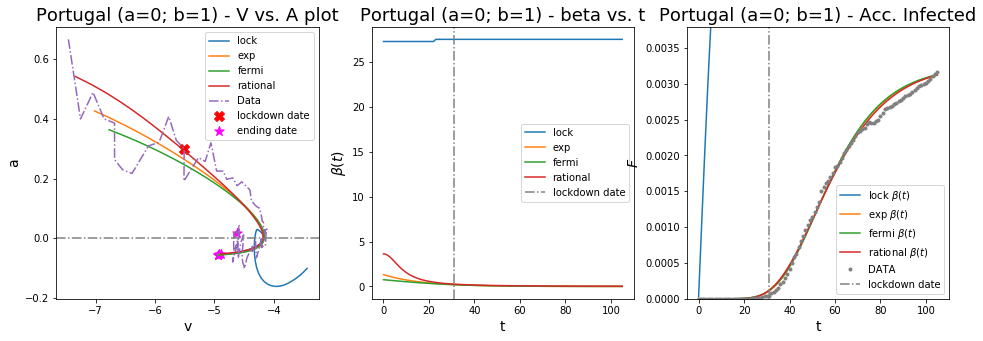

In [3]:
for i, country in enumerate(countries):
    for a_w, r_w in weights:

        fig, (ax, ax2, ax3) = plt.subplots(1,3,figsize=(16,5))

        for time in times:
            #load models and params
            mod=models[country][time]
            fname=time+'_'+str(a_w)+'_'+str(r_w)+'.csv'
            df = pd.read_csv('params/'+fname, index_col=0)
            opt_params=list(df.loc[country][:-2])

            ##in-loop plots
            #va
            v, a = mod.predict(opt_params)
            ax.plot(v, a, label=time)
            ax.scatter(v[-1], a[-1], c='magenta',marker='*',s=100,zorder=2)

            #beta
            t = np.arange(0, mod.T)
            beta = mod.predict(opt_params, out='Beta')
            ax2.plot(t, beta, label=time)

            #time series
            S,I,R = mod.predict(opt_params,out='SIR')
            plt.plot(t, I+R, label = time + r' $\beta(t)$')

        ##after loop plots
        intitle = ' (a='+str(int(a_w))+'; b='+str(int(r_w))+')'
        #va
        ax.plot(mod.v_data, mod.a_data, '-.', label='Data')
        ax.scatter(mod.v_data[mod.lock_index-L-z-1], mod.a_data[mod.lock_index-L-z-1], 
                        c='red',marker='X',s=100, label='lockdown date')
        ax.scatter(mod.v_data[-1], mod.a_data[-1], 
                        c='magenta',marker='*',s=100,zorder=2, label='ending date')

        #ax.set_xlim([-7., -3.5]) #not useful for fixed country
        ax.axhline(y=0, color='gray', linestyle='-.')
        ax.legend()
        ax.set_xlabel('v', size=14)
        ax.set_ylabel('a', size=14)
        ax.set_title(countries[i]+intitle+' - V vs. A plot', size=18)

        #beta
        ax2.axvline(x=mod.lock_index, color='grey', linestyle='-.', label='lockdown date')
        ax2.legend()
        ax2.set_xlabel('t', size=14)
        ax2.set_ylabel(r'$\beta(t)$', size=14)
        ax2.set_title(countries[i]+intitle+' - beta vs. t', size=18)

        #time series
        ax3.set_ylim([0,mod.data[-1]/mod.N*1.2])
        ax3.plot(t, mod.data/mod.N, '.', color='gray',label='DATA')
        ax3.axvline(x=mod.lock_index, color='grey', linestyle='-.', label='lockdown date')
        ax3.legend()
        ax3.set_xlabel('t', size=14)
        ax3.set_ylabel(r'$F$', size=14)
        ax3.set_title(countries[i]+intitle+' - Acc. Infected', size=18)
        plt.show()

# 2. different weights, fixed time

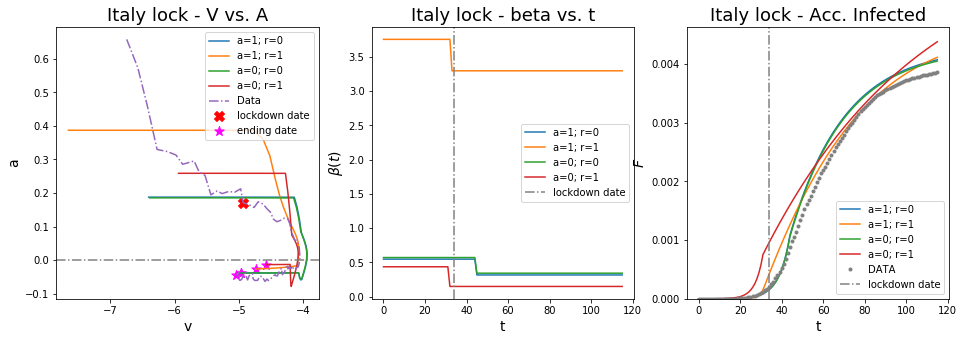

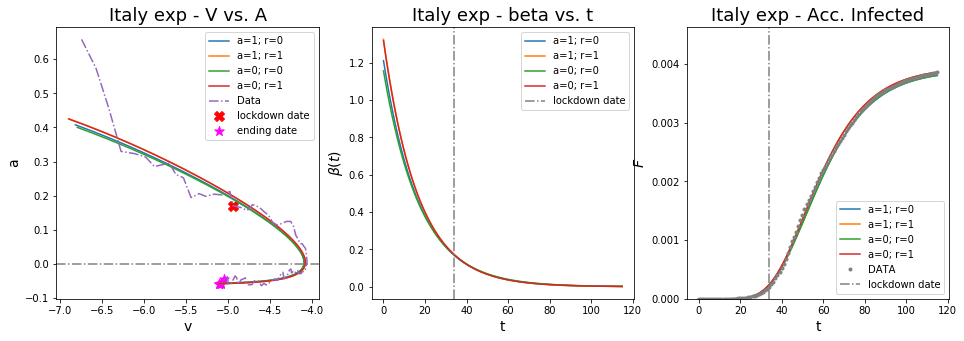

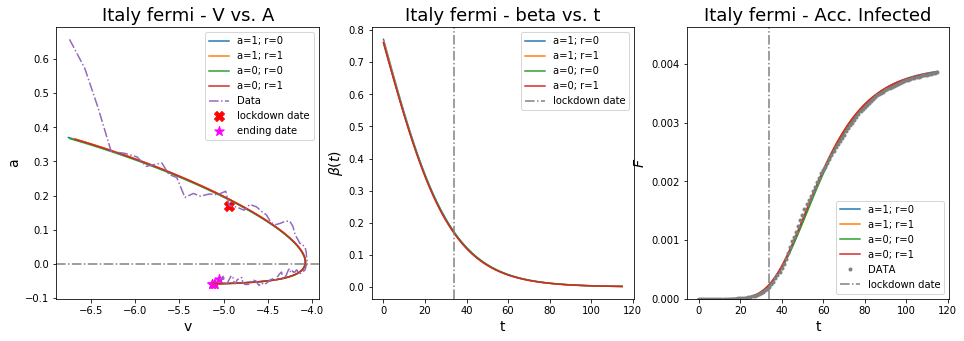

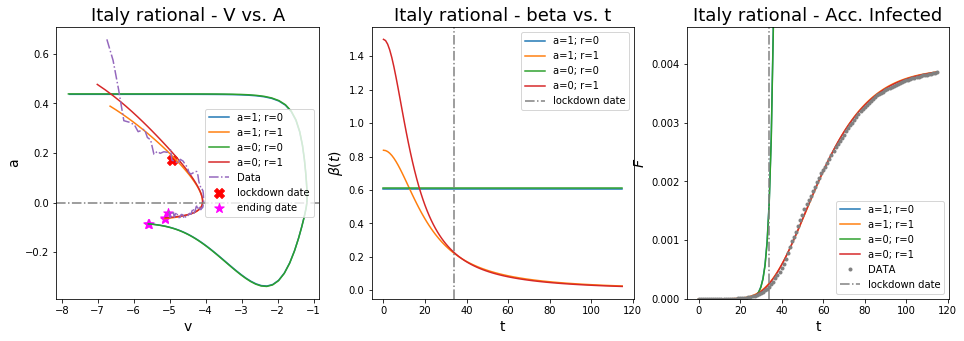

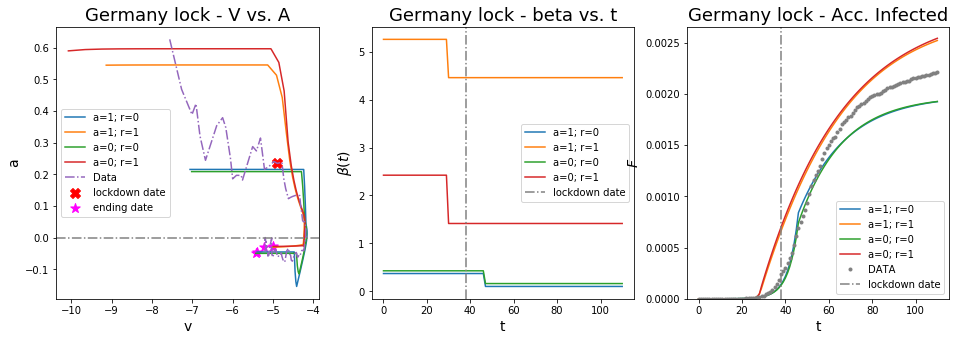

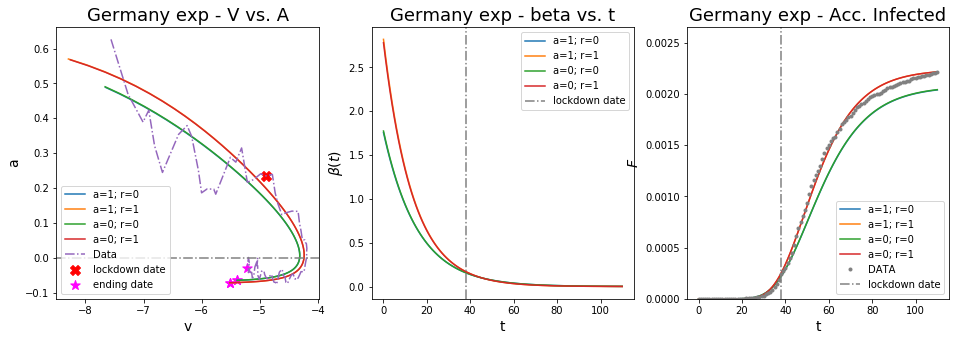

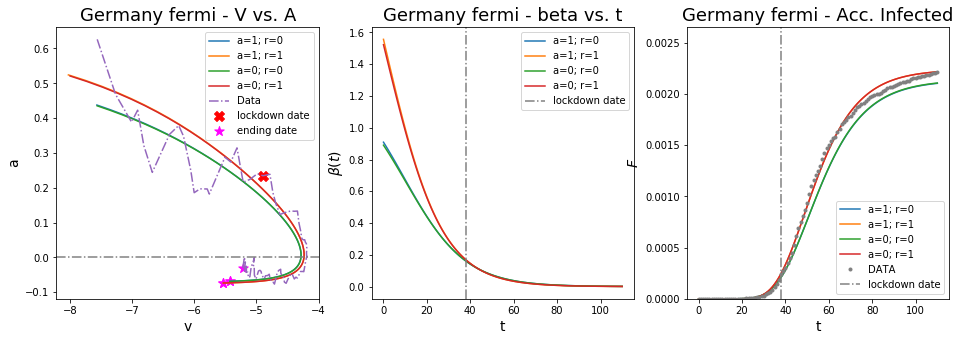

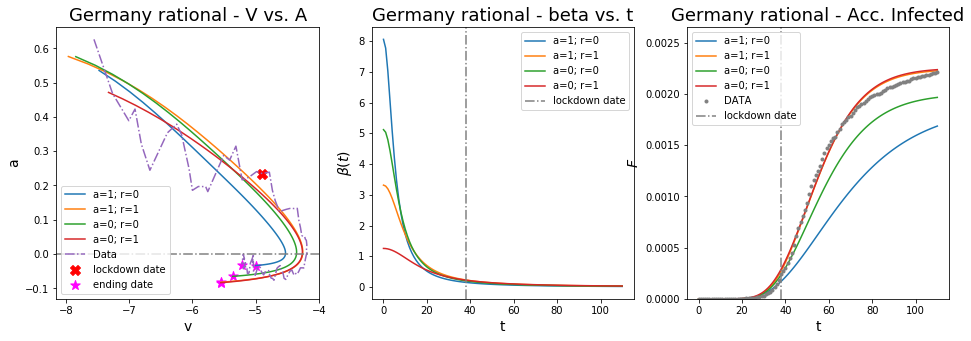

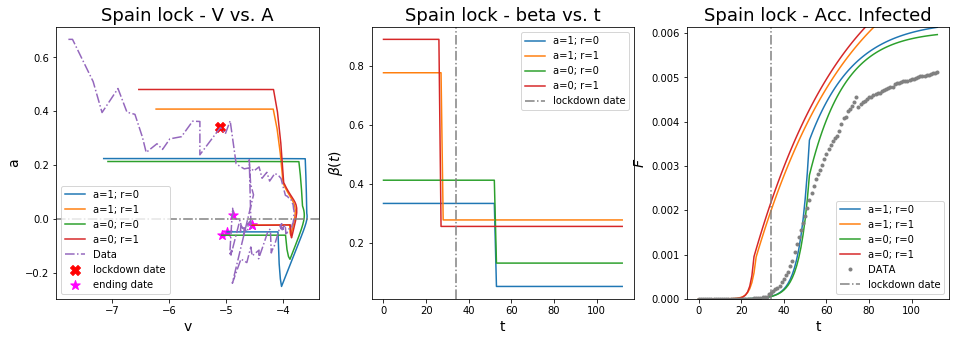

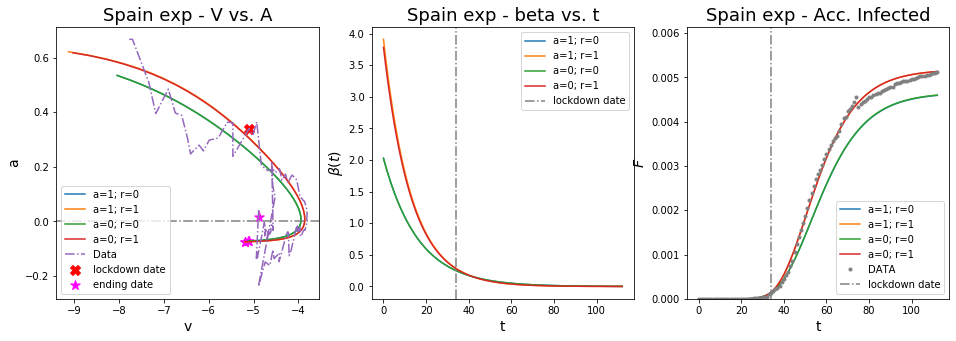

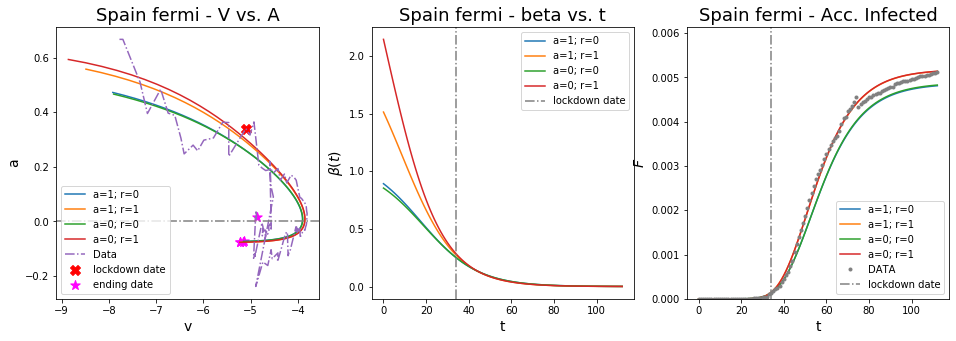

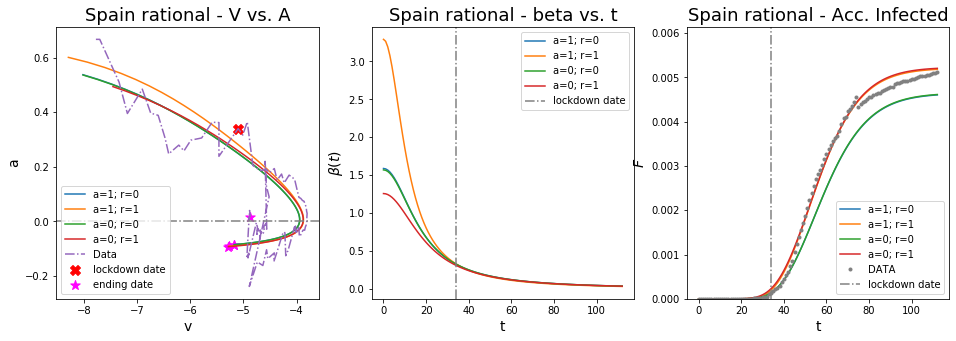

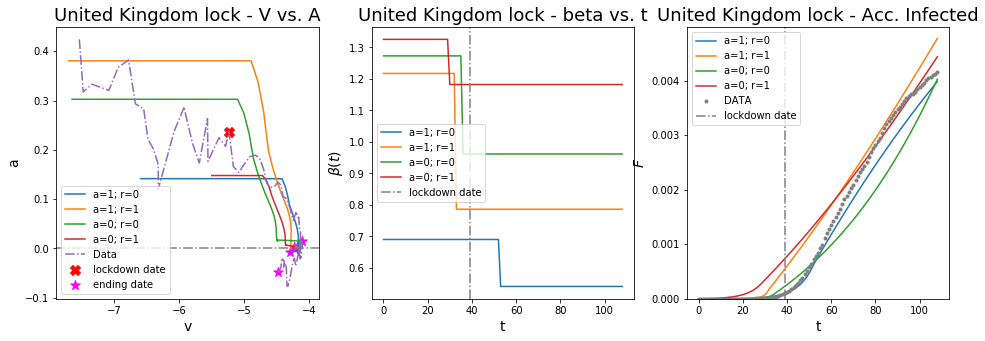

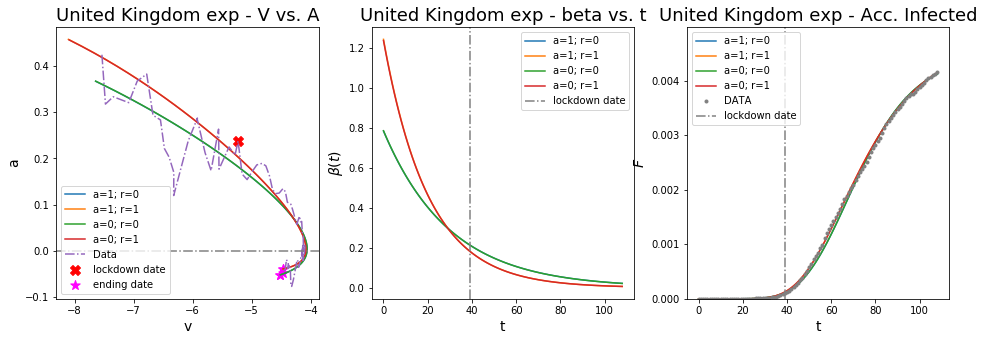

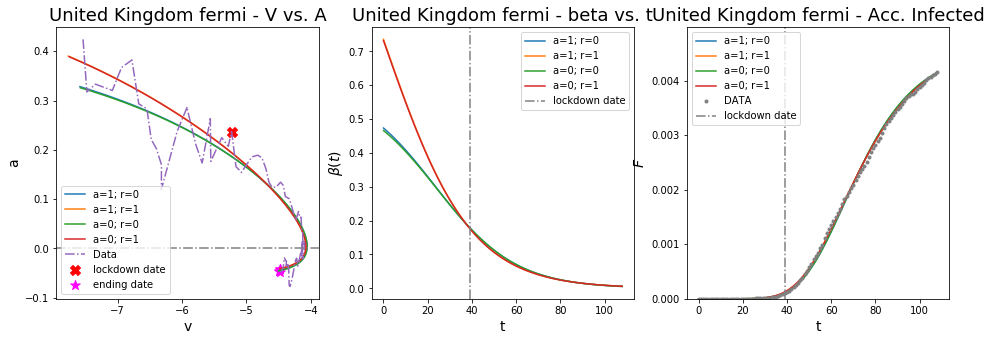

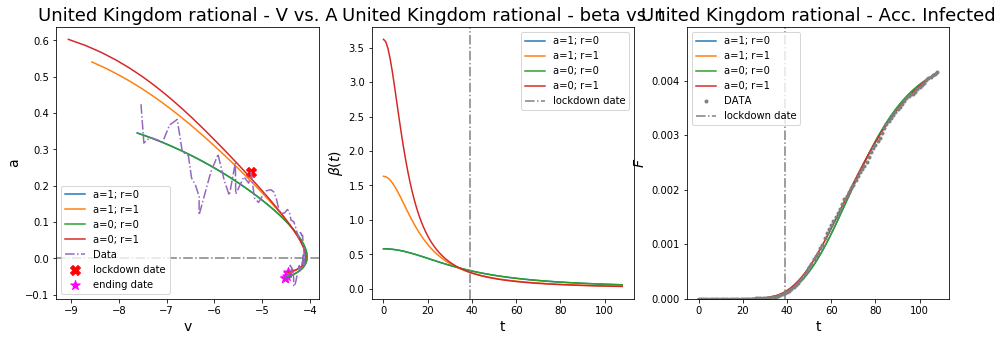

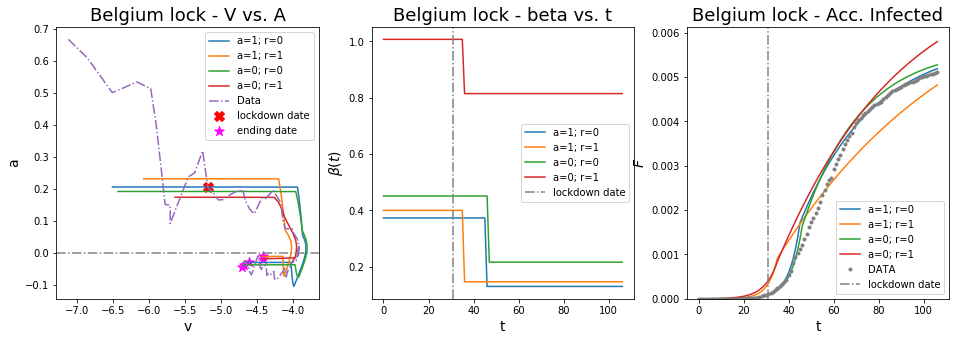

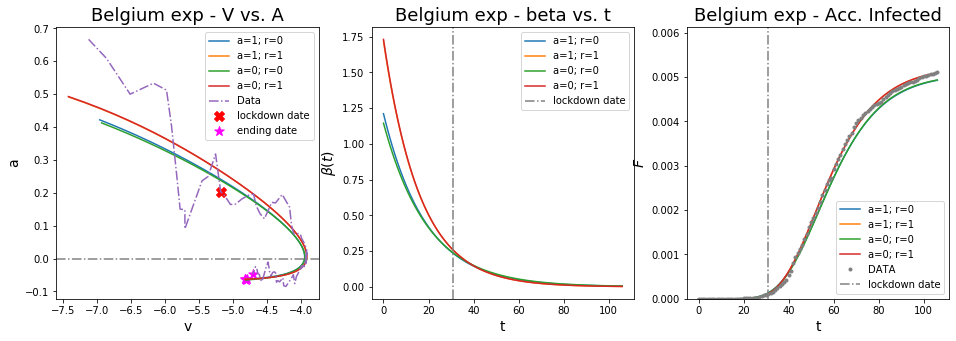

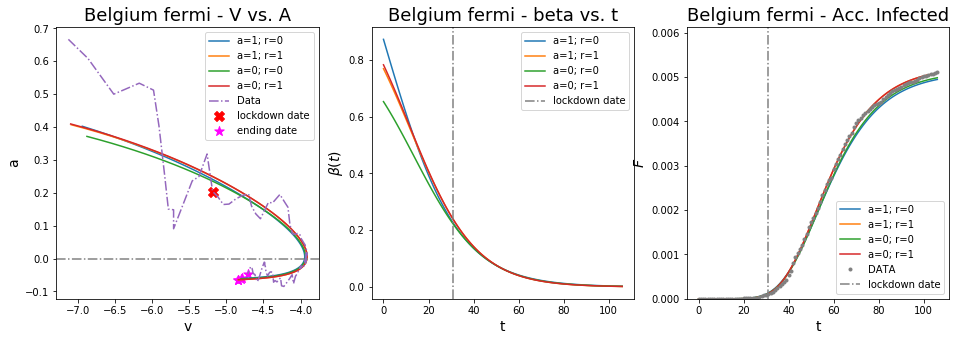

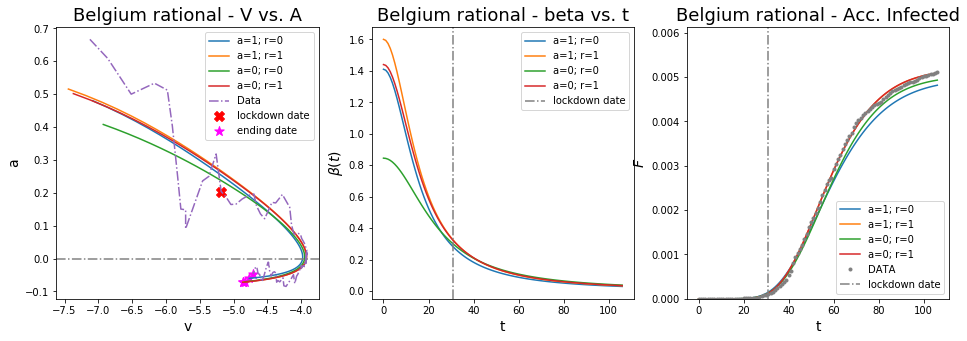

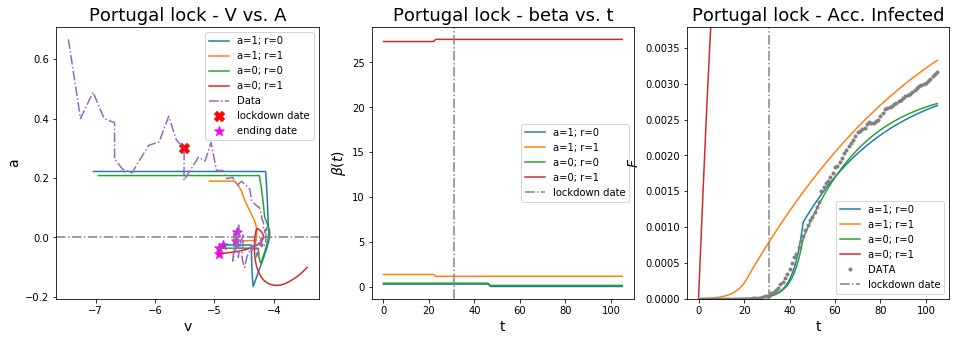

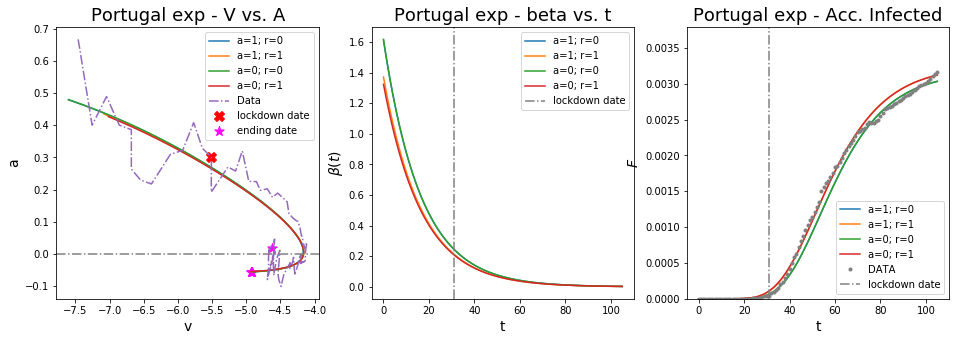

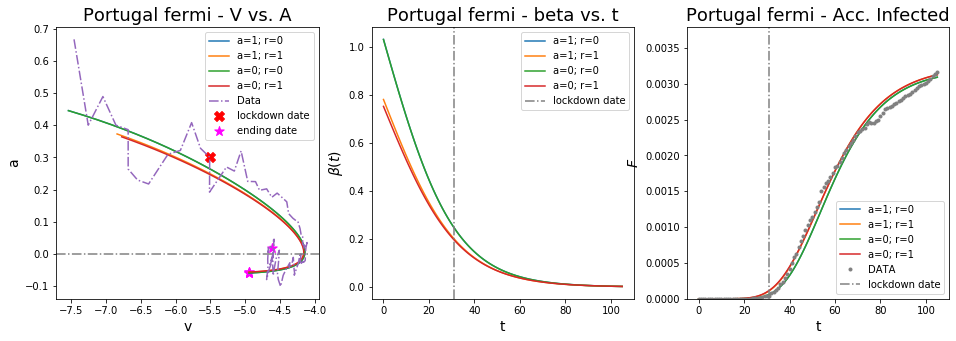

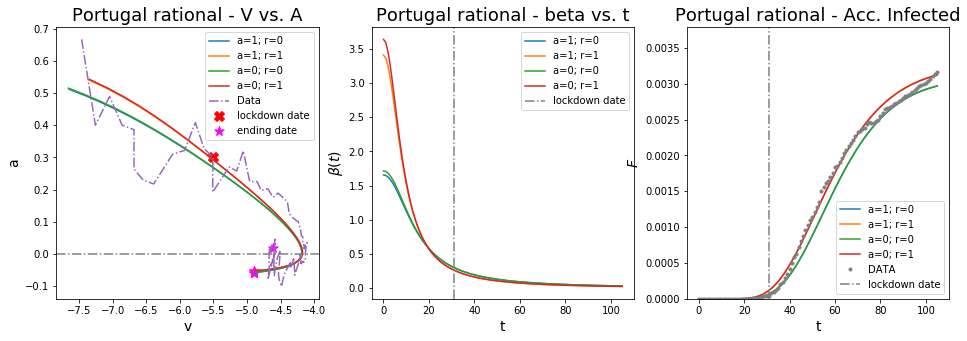

In [4]:
for i, country in enumerate(countries):
    for time in times:
        fig, (ax, ax2, ax3) = plt.subplots(1,3,figsize=(16,5))

        for a_w,r_w in weights:
            label='a=' +str(int(a_w))+'; r='+str(int(r_w))
            #load models and params
            mod=models[country][time]
            fname=time+'_'+str(a_w)+'_'+str(r_w)+'.csv'
            df = pd.read_csv('params/'+fname, index_col=0)
            opt_params=list(df.loc[country][:-2])

            ##in-loop plots
            #va
            v, a = mod.predict(opt_params)
            ax.plot(v, a, label=label)
            ax.scatter(v[-1], a[-1], c='magenta',marker='*',s=100,zorder=2)

            #beta
            t = np.arange(0, mod.T)
            beta = mod.predict(opt_params, out='Beta')
            ax2.plot(t, beta, label=label)

            #time series
            S,I,R = mod.predict(opt_params,out='SIR')
            plt.plot(t, I+R, label = label)

        ##after loop plots
        intitle=' '+time
        #va
        ax.plot(mod.v_data, mod.a_data, '-.', label='Data')
        ax.scatter(mod.v_data[mod.lock_index-L-z-1], mod.a_data[mod.lock_index-L-z-1], 
                        c='red',marker='X',s=100, label='lockdown date')
        ax.scatter(mod.v_data[-1], mod.a_data[-1], 
                        c='magenta',marker='*',s=100,zorder=2, label='ending date')

        #ax.set_xlim([-7., -3.5]) #not useful for fixed country
        ax.axhline(y=0, color='gray', linestyle='-.')
        ax.legend()
        ax.set_xlabel('v', size=14)
        ax.set_ylabel('a', size=14)
        ax.set_title(countries[i]+intitle+' - V vs. A', size=18)

        #beta
        ax2.axvline(x=mod.lock_index, color='grey', linestyle='-.', label='lockdown date')
        ax2.legend()
        ax2.set_xlabel('t', size=14)
        ax2.set_ylabel(r'$\beta(t)$', size=14)
        ax2.set_title(countries[i]+intitle+' - beta vs. t', size=18)

        #time series
        ax3.set_ylim([0,mod.data[-1]/mod.N*1.2])
        ax3.plot(t, mod.data/mod.N, '.', color='gray',label='DATA')
        ax3.axvline(x=mod.lock_index, color='grey', linestyle='-.', label='lockdown date')
        ax3.legend()
        ax3.set_xlabel('t', size=14)
        ax3.set_ylabel(r'$F$', size=14)
        ax3.set_title(countries[i]+intitle+' - Acc. Infected', size=18)
        plt.show()

# 3. AIC comparison

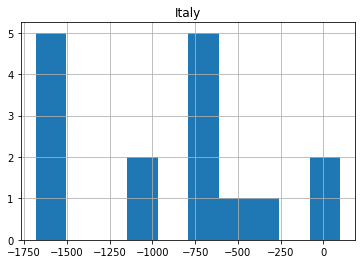

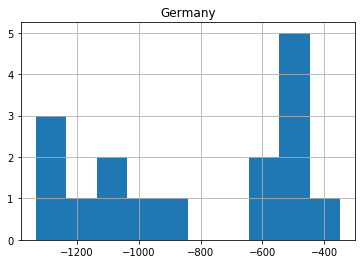

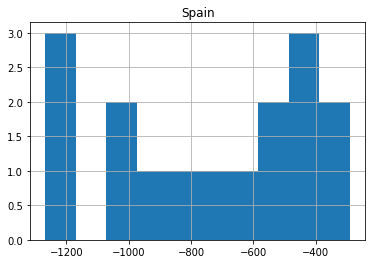

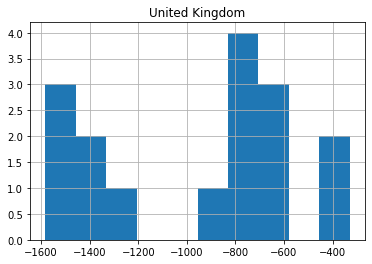

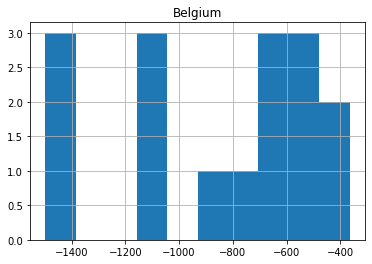

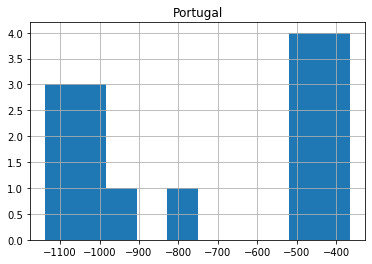

In [6]:
for country in countries:
    #load params
    fname='SIR_models.csv'
    df = pd.read_csv(fname, index_col=0)
    df = df[df.country==country]
    df=df.drop(columns='country')
    #hist AIC
    df.AIC.hist()
    plt.title(country)
    plt.show()

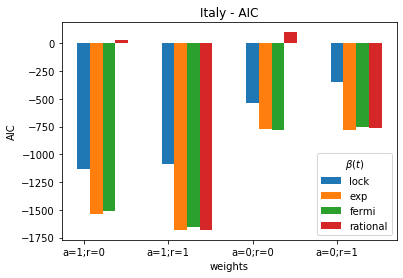

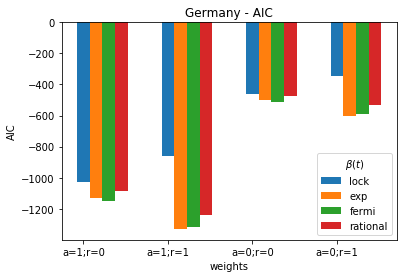

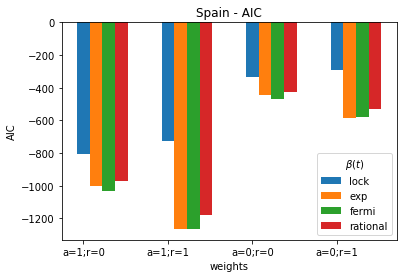

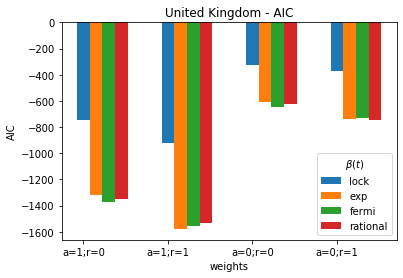

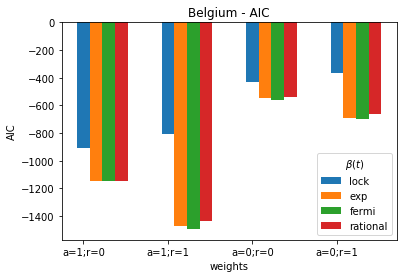

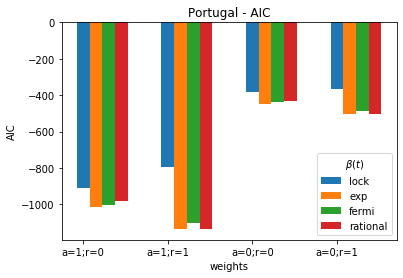

In [7]:
for country in countries:
    #load params
    fname='SIR_models.csv'
    df = pd.read_csv(fname, index_col=0)
    df = df[df.country==country]
    df=df.drop(columns='country')

    #rearange df in weights order:
    df=df.sort_values('a',axis=0, ascending=False)
    df1=df[df.a==1.].sort_values('r')
    df1.index=range(len(df1))
    df2=df[df.a==0.].sort_values('r')
    df2.index=range(len(df1),2*len(df1))
    df=pd.concat([df1,df2])

    #barplot
    width=0.15
    x=np.array(np.arange(4)-3*width)

    data=[]
    for i,time in enumerate(times):
        data=df[df.time==time]
        plt.bar(x+ i*width,list(data.AIC), width = width)
    plt.legend(title=r'$\beta(t)$', labels=times)
    plt.xticks(x, labels=['a='+str(int(weights[i][0]))+';r='+ str(int(weights[i][1])) for i in range(4)])
    plt.title(country + ' - AIC')
    plt.xlabel('weights')
    plt.ylabel('AIC')
    plt.show()

# 4.Parameters

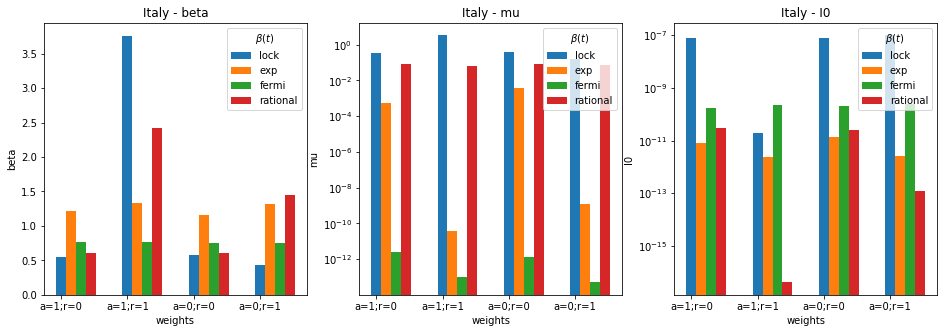

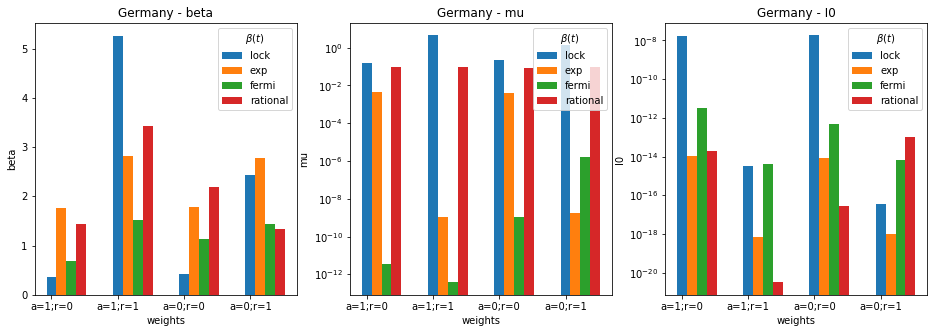

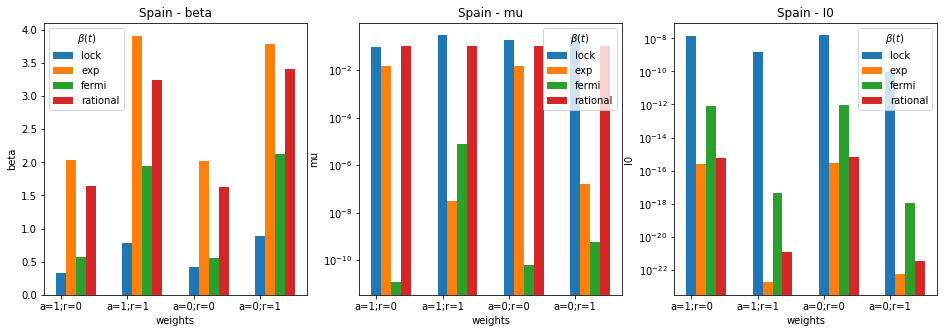

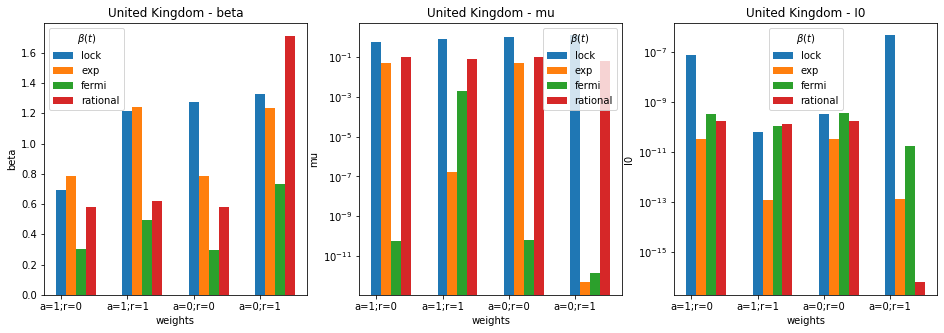

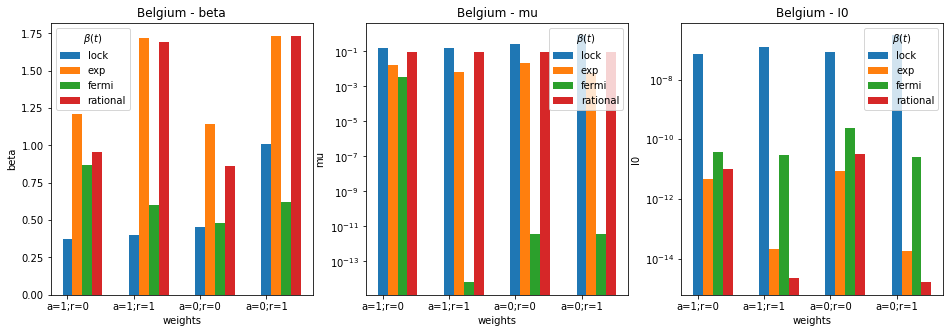

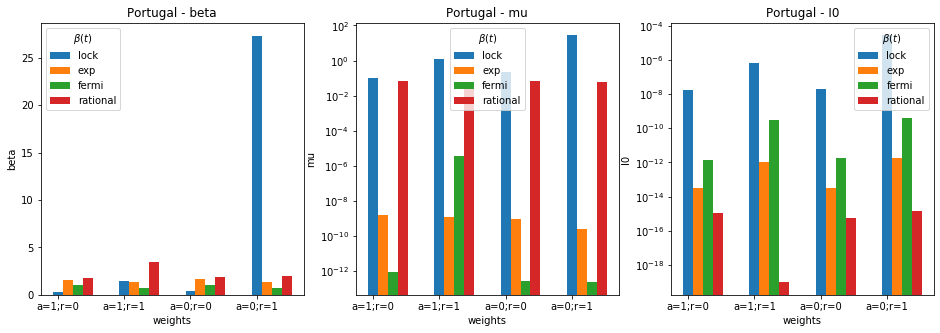

In [8]:
for country in countries:
    #load params
    fname='SIR_models.csv'
    df = pd.read_csv(fname, index_col=0)
    df = df[df.country==country]
    df=df.drop(columns='country')

    #rearange df in weights order:
    df=df.sort_values('a',axis=0, ascending=False)
    df1=df[df.a==1.].sort_values('r')
    df1.index=range(len(df1))
    df2=df[df.a==0.].sort_values('r')
    df2.index=range(len(df1),2*len(df1))
    df=pd.concat([df1,df2])

    #only params
    df=df[list(df.columns)[2:]]
    params=np.array(df.columns[3:])

    #SIR params

    #barplot
    width=0.15
    x=np.array(np.arange(4)-3*width)
    fig = plt.figure(figsize=(16,5))
    for j,p in enumerate(params[:3]):
        data=[]
        plt.subplot(1,3,j+1)
        for i,time in enumerate(times):
            data=df[df.time==time]
            data=data.dropna(axis=1)
            x=np.arange(len(data))
            plt.bar(x+ i*width,list(data[p]), width = width, label=time)
        plt.legend(title=r'$\beta(t)$')
        plt.xticks(x, labels=['a='+str(int(weights[i][0]))+';r='+ str(int(weights[i][1])) for i in range(4)])
        plt.title(country + ' - '+p)
        plt.xlabel('weights')
        plt.ylabel(p)
        if p=='I0' or p=='mu':
            plt.yscale('log')
    plt.show()

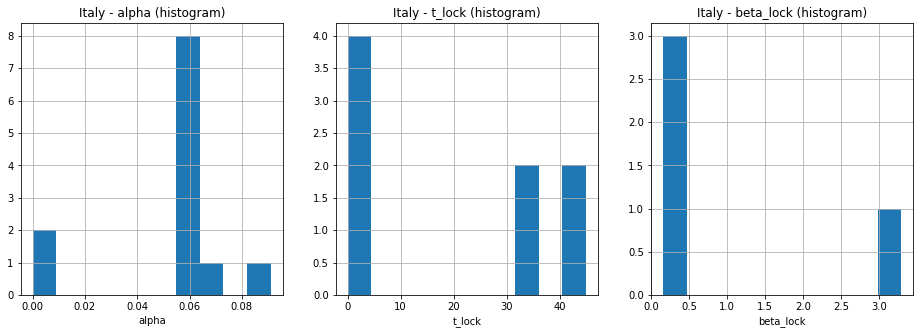

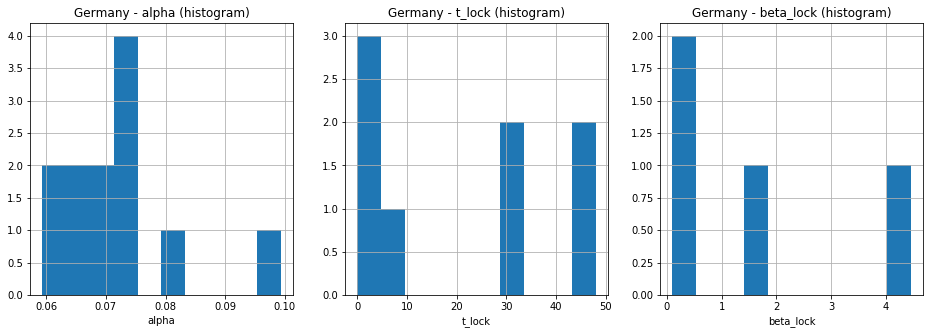

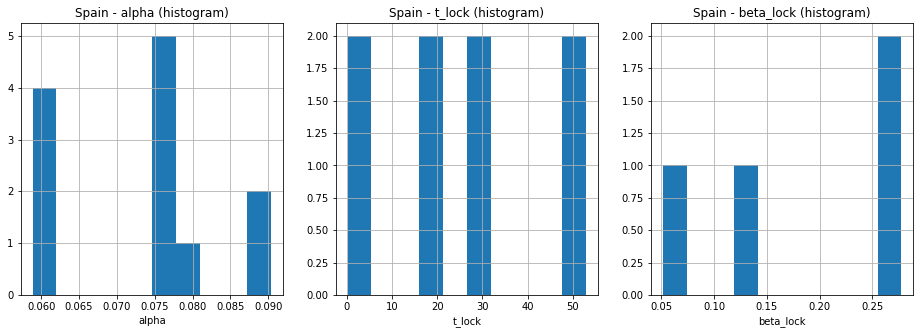

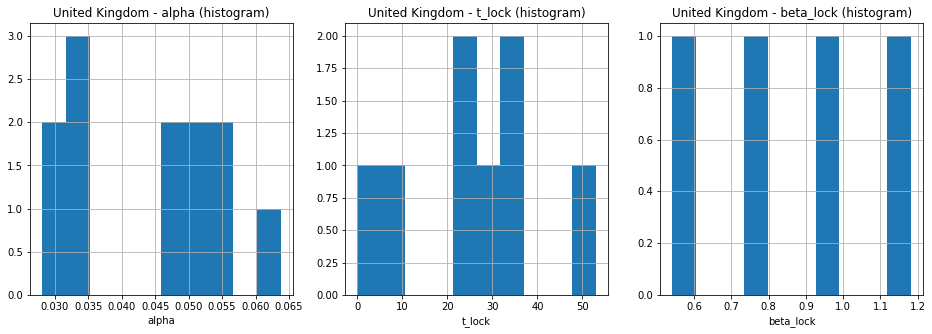

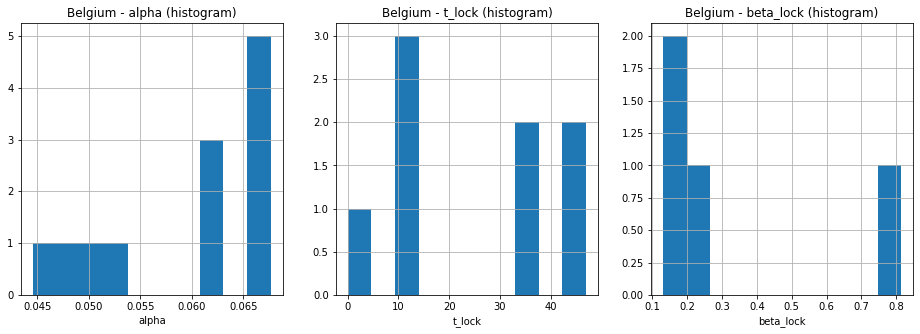

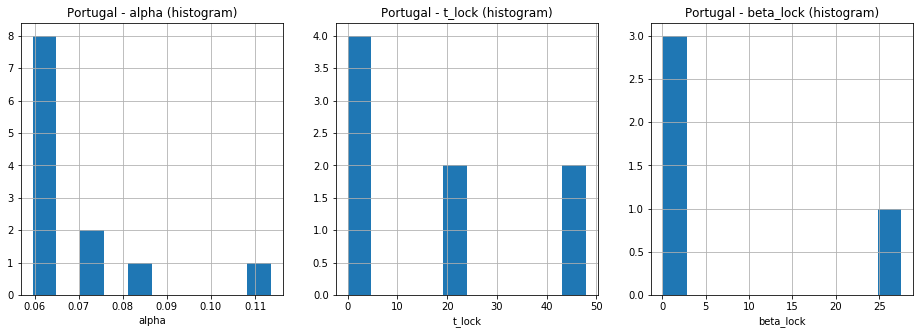

In [9]:
for country in countries:
    #load params
    fname='SIR_models.csv'
    df = pd.read_csv(fname, index_col=0)
    df = df[df.country==country]
    df=df.drop(columns='country')

    #rearange df in weights order:
    df=df.sort_values('a',axis=0, ascending=False)
    df1=df[df.a==1.].sort_values('r')
    df1.index=range(len(df1))
    df2=df[df.a==0.].sort_values('r')
    df2.index=range(len(df1),2*len(df1))
    df=pd.concat([df1,df2])

    #only params
    df=df[list(df.columns)[2:]]
    params=np.array(df.columns[3:])

    #time dep params
    fig = plt.figure(figsize=(16,5))
    for i, p in enumerate(params[-3:]):
        plt.subplot(1,3,i+1)
        df[p].hist()
        plt.title(country + ' - '+p +' (histogram)')
        plt.xlabel(p)
    plt.show()